In [1]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalMaxPooling1D
from keras.datasets import imdb

Using TensorFlow backend.


In [2]:
import numpy as np
# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# call load_data with allow_pickle implicitly set to true
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=20000)

# restore np.load for future normal usage
np.load = np_load_old

In [3]:
# 훈련셋과 검증셋 분리
x_val = x_train[20000:]
y_val = y_train[20000:]
x_train = x_train[:20000]
y_train = y_train[:20000]

print('x_train shape:', x_train.shape)

x_train shape: (20000,)


In [4]:
# 데이터셋 전처리
x_train = sequence.pad_sequences(x_train, maxlen=200)
x_val = sequence.pad_sequences(x_val, maxlen=200)
x_test = sequence.pad_sequences(x_test, maxlen=200)

In [12]:
# 모델 구성
model = Sequential()
model.add(Embedding(20000, 128))
model.add(Conv1D(256, # filters
                 3, # kernel_size
                 padding='valid',
                 activation='relu',
                 strides=1))
model.add(GlobalMaxPooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [13]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 128)         2560000   
_________________________________________________________________
conv1d_2 (Conv1D)            (None, None, 256)         98560     
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 129       
Total params: 2,691,585
Trainable params: 2,691,585
Non-trainable params: 0
_________________________________________________________________
None


In [14]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) # 모델 학습과정 설정

hist = model.fit(x_train, y_train, epochs=3, batch_size=64, validation_data=(x_val, y_val))
# 모델 학습시키기

scores = model.evaluate(x_train, y_train, verbose=0) # 테스트 데이터에 대해서 정확도 평가
print("정확도: %.2f%%" % (scores[1]*100))

Train on 20000 samples, validate on 5000 samples
Epoch 1/3
20000/20000 [==============================] - 96s 5ms/step - loss: 0.4255 - acc: 0.7918 - val_loss: 0.2871 - val_acc: 0.8794
Epoch 2/3
20000/20000 [==============================] - 95s 5ms/step - loss: 0.1751 - acc: 0.9357 - val_loss: 0.2667 - val_acc: 0.8974
Epoch 3/3
20000/20000 [==============================] - 97s 5ms/step - loss: 0.0418 - acc: 0.9893 - val_loss: 0.3130 - val_acc: 0.8914
정확도: 99.95%


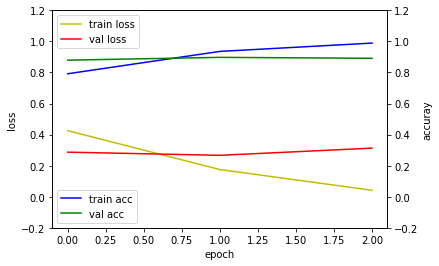

In [15]:
# 학습과정
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([-0.2, 1.2])

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylim([-0.2, 1.2])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [16]:
# 모델 평가
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=64)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

25000/25000 [==============================] - 40s 2ms/step
## evaluation loss and_metrics ##
[0.32807222398757935, 0.88412]
